How I ran: <br>
1. clone https://github.com/amazon-science/chronos-forecasting
2. put this file in project root folder
3. get datasets from google drive folder and put in data folder in project root folder

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from src.chronos import ChronosPipeline

In [14]:
pipeline = ChronosPipeline.from_pretrained(
    "amazon/chronos-t5-small",
    device_map="cuda",  # use "cpu" for CPU inference and "mps" for Apple Silicon
    torch_dtype=torch.bfloat16,
)

In [15]:
df = pd.read_csv("https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv")
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [16]:
df["column"] = 2
df

,Month,#Passengers,column
0,1949-01,112,2
1,1949-02,118,2
2,1949-03,132,2
3,1949-04,129,2
4,1949-05,121,2
...,...,...,...
139,1960-08,606,2
140,1960-09,508,2
141,1960-10,461,2
142,1960-11,390,2


In [17]:
# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
context = torch.tensor([df["#Passengers"], df['column']])
prediction_length = 12
forecast = pipeline.predict(
    context,
    prediction_length,
    num_samples=20,
    temperature=1.0,
    top_k=50,
    top_p=1.0,
) # forecast shape: [num_series, num_samples, prediction_length]


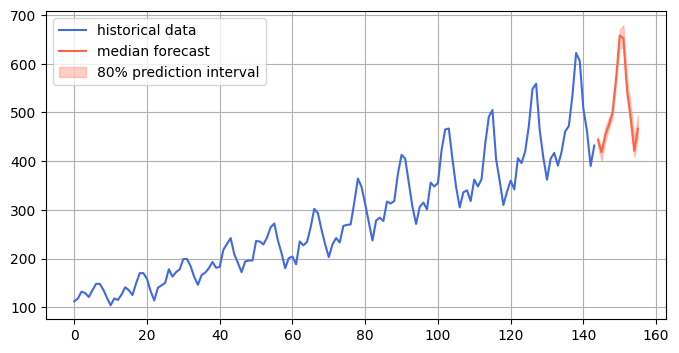

In [18]:
# visualize the forecast
forecast_index = range(len(df), len(df) + prediction_length)
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

plt.figure(figsize=(8, 4))
plt.plot(df["#Passengers"], color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.show()

In [19]:
# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
context = torch.tensor([df["#Passengers"], df["column"]])
embeddings, tokenizer_state = pipeline.embed(context)

In [20]:
embeddings

tensor([[[ 0.0408,  0.0236,  0.0098,  ...,  0.0152,  0.0237, -0.0018],
         [ 0.0299, -0.0315,  0.0388,  ...,  0.0347,  0.0178, -0.0016],
         [-0.0239,  0.0167,  0.0408,  ...,  0.0488,  0.0052,  0.0203],
         ...,
         [ 0.0569,  0.0231,  0.0063,  ..., -0.1074,  0.0008, -0.0070],
         [-0.0325, -0.0325, -0.0060,  ..., -0.0718, -0.0034,  0.0277],
         [ 0.0072,  0.0172, -0.0175,  ..., -0.0034, -0.0121,  0.0309]],

        [[-0.0072, -0.0248, -0.0176,  ...,  0.0017,  0.0128,  0.0085],
         [-0.0067, -0.0248, -0.0176,  ...,  0.0020,  0.0119,  0.0083],
         [-0.0069, -0.0244, -0.0171,  ...,  0.0022,  0.0117,  0.0080],
         ...,
         [ 0.0113, -0.0270, -0.0444,  ..., -0.0104,  0.0008,  0.0092],
         [ 0.0093, -0.0479, -0.0613,  ..., -0.0101, -0.0030,  0.0073],
         [ 0.0007,  0.0064, -0.0184,  ...,  0.0471, -0.0010, -0.0025]]],
       dtype=torch.bfloat16)

<h4> now try with different dataset </h4>

In [21]:
pipeline = ChronosPipeline.from_pretrained(
    "amazon/chronos-t5-small",
    device_map="cuda",  # use "cpu" for CPU inference and "mps" for Apple Silicon
    torch_dtype=torch.bfloat16,
)

In [22]:
df = pd.read_csv(r"data\amazon_stock.csv")

In [23]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-10,93.543999,94.713501,90.908501,94.591003,94.591003,142666000
1,2020-03-11,92.892502,93.566002,90.074997,91.042999,91.042999,112496000
2,2020-03-12,86.098999,88.250000,83.750000,83.830498,83.830498,226924000
3,2020-03-13,87.750000,89.315498,84.030998,89.250000,89.250000,176194000
4,2020-03-16,82.075500,87.972504,81.301498,84.457497,84.457497,178346000
...,...,...,...,...,...,...,...
1028,2024-04-10,182.770004,186.270004,182.669998,185.949997,185.949997,35879200
1029,2024-04-11,186.740005,189.770004,185.509995,189.050003,189.050003,40020700
1030,2024-04-12,187.720001,188.380005,185.080002,186.130005,186.130005,38554300
1031,2024-04-15,187.429993,188.690002,183.000000,183.619995,183.619995,48052400


In [24]:
# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
context = torch.tensor([df["Open"]])
prediction_length = 30
forecast = pipeline.predict(
    context,
    prediction_length,
    num_samples=20,
    temperature=1.0,
    top_k=50,
    top_p=1.0,
) # forecast shape: [num_series, num_samples, prediction_length]

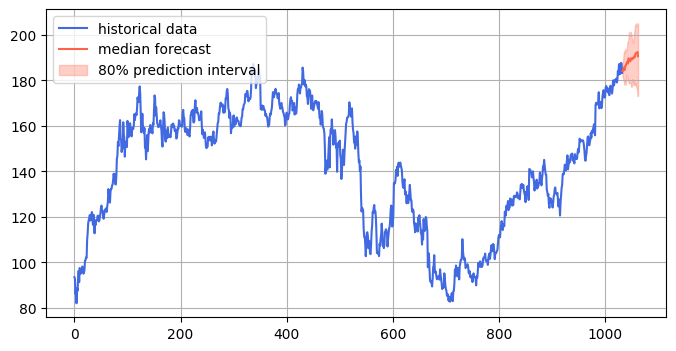

In [25]:
# visualize the forecast
forecast_index = range(len(df), len(df) + prediction_length)
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

plt.figure(figsize=(8, 4))
plt.plot(df["Open"], color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.show()

In [39]:
layoff_df = pd.read_csv(r"data\layoffs.csv")
layoff_df = layoff_df.rename(columns={"date":"Date"})

In [42]:
layoff_df['industry'].value_counts()

industry
Finance           441
Retail            296
Healthcare        286
Other             218
Transportation    215
Food              207
Consumer          202
Marketing         174
Real Estate       150
Crypto            142
Education         140
Media             137
Security          121
Data              116
HR                 95
Travel             94
Infrastructure     64
Logistics          64
Sales              55
Support            53
Hardware           49
Recruiting         48
Product            46
Fitness            41
Energy             29
Construction       24
Legal              18
Manufacturing      17
Aerospace          15
AI                 10
Name: count, dtype: int64

In [47]:
layoff_df_retail = layoff_df.loc[layoff_df['industry'] == "Retail"]
total_layoffs = layoff_df_retail[["Date","total_laid_off"]].groupby("Date").sum().reset_index()
total_layoffs

,Date,total_laid_off
0,2020-03-12,20.0
1,2020-03-19,0.0
2,2020-03-23,91.0
3,2020-03-24,0.0
4,2020-03-25,0.0
...,...,...
223,2024-02-26,0.0
224,2024-03-19,195.0
225,2024-04-03,280.0
226,2024-04-08,79.0


In [48]:
merged_df = pd.merge(df, total_layoffs, on="Date", how="outer").fillna(0)

In [49]:
merged_df

,Date,Open,High,Low,Close,Adj Close,Volume,total_laid_off
0,2020-03-10,93.543999,94.713501,90.908501,94.591003,94.591003,142666000.0,0.0
1,2020-03-11,92.892502,93.566002,90.074997,91.042999,91.042999,112496000.0,0.0
2,2020-03-12,86.098999,88.250000,83.750000,83.830498,83.830498,226924000.0,20.0
3,2020-03-13,87.750000,89.315498,84.030998,89.250000,89.250000,176194000.0,0.0
4,2020-03-16,82.075500,87.972504,81.301498,84.457497,84.457497,178346000.0,0.0
...,...,...,...,...,...,...,...,...
1040,2024-04-11,186.740005,189.770004,185.509995,189.050003,189.050003,40020700.0,0.0
1041,2024-04-12,187.720001,188.380005,185.080002,186.130005,186.130005,38554300.0,0.0
1042,2024-04-15,187.429993,188.690002,183.000000,183.619995,183.619995,48052400.0,0.0
1043,2024-04-16,183.270004,184.830002,182.259995,183.320007,183.320007,32891300.0,0.0


In [51]:
# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
context = torch.tensor([merged_df["total_laid_off"]])
prediction_length = 30
forecast = pipeline.predict(
    context,
    prediction_length,
    num_samples=20,
    temperature=1.0,
    top_k=50,
    top_p=1.0,
) # forecast shape: [num_series, num_samples, prediction_length]

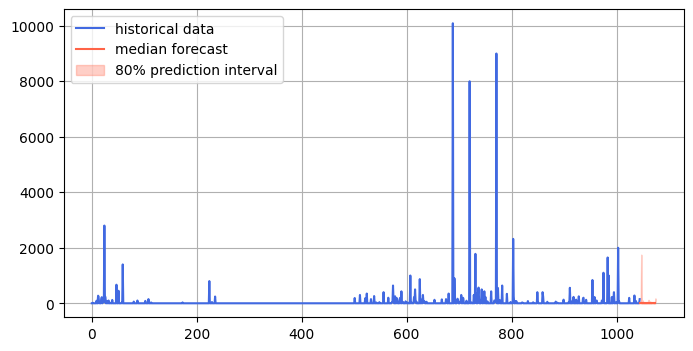

In [53]:
# visualize the forecast
forecast_index = range(len(merged_df), len(merged_df) + prediction_length)
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

plt.figure(figsize=(8, 4))
plt.plot(merged_df["total_laid_off"], color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.show()